02_NN_blocks_backprop

Азиз Мамаджанов, ПМ20-1

Немного поздно сдал, но готов защитить устно

Использовал код с семинаров

In [1]:
import torch
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights = weights
    self.bias = bias
  
  def forward(self, inputs):
    return torch.dot(self.weights, inputs) + bias # <реализовать логику нейрона>


In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

test = Neuron(weights, bias)
test.forward(inputs)

tensor(4.8400)

In [4]:
dot = sum([x*y for x,y in zip(inputs, weights)]) + bias
dot

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [5]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
  
  def forward(self, inputs):
    return torch.mv(self.weights, inputs) + self.biases # <реализовать логику слоя>

In [6]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]) # .T

biases = torch.tensor([3.14, 2.71, 7.2])

layer = Linear(weights, biases)
layer.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

In [7]:
weights.shape

torch.Size([3, 4])

In [8]:
inputs.shape

torch.Size([4])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [9]:
class Linear:
  def __init__(self, weights, biases):
    # <создать атрибуты объекта weights и biases>
    self.weights = weights
    self.biases = biases
  
  def forward(self, inputs):
    A = []
    for input in inputs:
      A.append(torch.mv(self.weights, input) + self.biases) # <реализовать логику слоя>
    return A

In [10]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8],
                       [-1.5, 2.7, 3.3, 14]])

batchlayer = Linear(weights, biases)
batchlayer.forward(inputs)

[tensor([3.7900, 0.9200, 9.0850]),
 tensor([ 6.1400, -2.1000,  6.9000]),
 tensor([2.0400, 0.7610, 6.7260]),
 tensor([12.4000, -6.6390, 19.6020])]

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [11]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.normal(0, 1, (n_features, n_neurons))
    self.biases = torch.zeros(1, n_neurons)
  
  def forward(self, inputs):
    res = inputs @ self.weights + self.biases # <реализовать логику слоя>
    return res

In [12]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [13]:
std_batchlayer = Linear(4, 3)
std_batchlayer.forward(inputs)

tensor([[ 2.0186, -0.3452, -4.0026],
        [ 5.1947,  1.7344, -4.0371],
        [ 3.1527,  7.2826, -2.6656]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [14]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [15]:
std_batchlayer_1 = Linear(4, 3)
res = std_batchlayer_1.forward(inputs)

#print(res)

std_batchlayer_2 = Linear(3, 7)
std_batchlayer_2.forward(res)

tensor([[ -0.5873,   0.3711,   6.8324,  -4.1068,  -2.1889,  -5.6515,  -4.9481],
        [  8.7990,  -1.1441,  11.2402,  -6.2582,  -6.7123,  -5.7241, -10.6669],
        [-11.7667,   2.2334,   4.1067,  -2.8179,   2.1253,  -8.1065,   1.2072]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [16]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    return torch.where(inputs >= 0, inputs, 0)

In [17]:
inputs

tensor([[ 1.0000,  2.0000,  3.0000,  2.5000],
        [ 2.0000,  5.0000, -1.0000,  2.0000],
        [-1.5000,  2.7000,  3.3000, -0.8000]])

In [18]:
Re = ReLU()
Re.forward(inputs)

tensor([[1.0000, 2.0000, 3.0000, 2.5000],
        [2.0000, 5.0000, 0.0000, 2.0000],
        [0.0000, 2.7000, 3.3000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [19]:
inputs = torch.normal(0, 1, size=(4, 3))
inputs

tensor([[-0.5484,  0.3563, -0.6715],
        [ 0.9984,  1.3580,  0.0660],
        [ 0.4417,  0.2665,  2.1310],
        [ 1.6068, -0.7388,  1.2688]])

In [20]:
class Softmax:
  def forward(self, inputs):
    # <реализовать логику Softmax>
    return torch.exp(inputs)/torch.exp(inputs).sum(axis=1).reshape(-1, 1)

In [21]:
Softmax().forward(inputs)

tensor([[0.2296, 0.5674, 0.2030],
        [0.3538, 0.5069, 0.1393],
        [0.1378, 0.1157, 0.7465],
        [0.5528, 0.0530, 0.3942]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [22]:
inputs = torch.normal(0, 1, size=(4, 3))
inputs

tensor([[-1.2305,  1.6732,  1.4160],
        [ 0.1180,  0.0699,  0.0816],
        [-0.6429,  0.6467, -0.7360],
        [-1.2043,  0.3551,  0.2074]])

In [23]:
class ELU:
   def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha

   def forward(self, inputs):
    # <реализовать логику ReLU>
    return torch.where(inputs < 0, self.alpha * (torch.exp(inputs) - 1), inputs)

In [24]:
my_ELU = ELU(0.25)
my_ELU.forward(inputs)

tensor([[-0.1770,  1.6732,  1.4160],
        [ 0.1180,  0.0699,  0.0816],
        [-0.1186,  0.6467, -0.1302],
        [-0.1750,  0.3551,  0.2074]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [25]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_true - y_pred)**2).mean()

In [26]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [27]:
n1 = Linear(4, 1)  # 4 фичи, 1 нейронов, рамер батча 3
y_hat = n1.forward(inputs)
y_hat

tensor([[ 0.1816],
        [-2.2643],
        [ 0.1108]])

In [28]:
y = y.reshape(-1, 1)
MSELoss().forward(y_hat, y)

tensor(15.3819)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [29]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
    return -torch.log(y_pred.gather(dim=1, index=y_true.view(-1, 1))).mean()

In [30]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [31]:

n1 = Linear(4, 3)  # 4 фичи, 3 нейрона, рамер батча 3
output = n1.forward(inputs)
y_hat = Softmax().forward(output)
np.round(y_hat, 4)

tensor([[0.0547, 0.1111, 0.8341],
        [0.0010, 0.9899, 0.0090],
        [0.0000, 0.5075, 0.4925]])

In [32]:
CategoricalCrossentropyLoss().forward(y_hat, y)

tensor(6.4839)

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [33]:
class MSELossL2:
  def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
    self.lambda_ = lambda_

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    return ((y_true - y_pred)**2).sum()

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    return self.lambda_ * (layer.weights**2).sum() + self.lambda_ * (layer.biases**2).sum()

  def forward(self, y_pred, y_true, l):
    return self.data_loss(y_pred, y_true) + self.reg_loss(l)

In [34]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [35]:
n1 = Linear(4, 1)  # 4 фичи, 1 нейронов, рамер батча 3
y_hat = n1.forward(inputs)
y_hat

tensor([[-3.9056],
        [ 0.5289],
        [-7.2425]])

In [36]:
MSELossL2(lambda_=2).forward(y_hat, y, n1)

tensor(489.5292)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [37]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.Tensor(X)  
y = torch.Tensor(y).view(-1, 1)

In [38]:
X.dtype, y.dtype 

(torch.float32, torch.float32)

In [39]:
y

tensor([[  72.5329],
        [   3.9988],
        [-162.8046],
        [  91.2910],
        [  37.3235],
        [ 193.0884],
        [-195.0520],
        [ -26.2136],
        [-228.4084],
        [ -33.8088],
        [-228.5334],
        [-144.2758],
        [ -18.1413],
        [ -40.6244],
        [-107.0331],
        [ -90.6566],
        [  55.0309],
        [ 106.3645],
        [   6.4386],
        [ -21.9541],
        [ 122.3422],
        [ 200.9162],
        [ -17.3775],
        [ 205.6700],
        [  40.9745],
        [ -89.7914],
        [-121.3813],
        [ -40.7023],
        [ 159.1773],
        [ -25.8365],
        [ -18.5800],
        [  14.8658],
        [ -21.4148],
        [  42.4147],
        [   4.8735],
        [-141.7439],
        [ -61.2853],
        [ -34.2840],
        [ -96.3828],
        [ 144.7747],
        [  70.9555],
        [  53.6440],
        [ -12.3581],
        [ -87.2265],
        [ -19.0987],
        [  15.2889],
        [  57.4967],
        [  92

In [40]:
features = X.size()[1]

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [41]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return torch.square(y_true - y_pred).mean()

  def backward(self, y_pred, y_true):
    self.dinput = (2 / len(y_pred)) * (y_pred - y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [42]:
class Neuron:
  def __init__(self, n_inputs, n_outputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.normal(0, 1, size=(n_inputs, n_outputs))
    self.bias = torch.normal(0, 1, size=(1, n_outputs))
  
  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias  # <реализовать логику нейрона>
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T @ dvalue  # df/dW
    self.dinput = dvalue @ self.weights.T  # df/wX
    self.dbias = dvalue.mean(dim=0)  # df/db

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [43]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs, n_outputs=1)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [44]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_true - y_pred)**2).mean()  # <реализовать логику MSE>

  def backward(self, y_pred, y_true):
    self.dinput = -2*(y_true - y_pred) / y_pred.shape[0]  # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [45]:
class Neuron:
  def __init__(self, n_inputs, n_outputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.normal(0, 1, size=(n_inputs, n_outputs))
    self.bias  = torch.normal(0, 1, size=(1, n_outputs))
  
  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias   # <реализовать логику нейрона>
  
  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = self.inputs.T @ dvalue  # df/dW
    # self.dinput = dvalue @ self.weights.T  # df/wX
    self.dbias = dvalue.mean(dim=0)  # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [46]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs, 1)
loss = SquaredLoss()

losses = []
for epoch in range(100):
#   for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [47]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    self.weights = torch.normal(0, 1, size=(n_features, n_neurons))
    self.bias  = torch.normal(0, 1, size=(1, n_neurons))
  
  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias   # <реализовать логику слоя>

  def backward(self, dvalues):
    self.dweights = self.inputs.T @ dvalues  # df/dW
    self.dinput = dvalues @ self.weights.T  # df/wX
    self.dbias = dvalues.mean(dim=0)  # df/db

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [48]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [49]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [50]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  out1 = fc1.forward(X)
  out2 = relu1.forward(out1)
  y_pred = fc2.forward(out2)
  data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

  if epoch % 200 == 0:
      print(f'epoch {epoch} mean loss {data_loss}')
      ys.append(y_pred)

# <backprop> 
# loss > fc2 > relu1 > fc1
  loss.backward(y_pred, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinput)
  fc1.backward(relu1.dinputs)
# <шаг оптимизации для fc1>
  fc1.weights -= lr * fc1.dweights
  fc1.bias -= lr * fc1.dbias
# <шаг оптимизации для fc2>
  fc2.weights -= lr * fc2.dweights
  fc2.bias -= lr * fc2.dbias

epoch 0 mean loss 7.1976165771484375
epoch 200 mean loss 0.09116422384977341
epoch 400 mean loss 0.07882893830537796
epoch 600 mean loss 0.061739109456539154
epoch 800 mean loss 0.043395206332206726
epoch 1000 mean loss 0.028735294938087463
epoch 1200 mean loss 0.0198002178221941
epoch 1400 mean loss 0.01540947426110506
epoch 1600 mean loss 0.013429900631308556
epoch 1800 mean loss 0.012604287825524807
epoch 2000 mean loss 0.012243642471730709


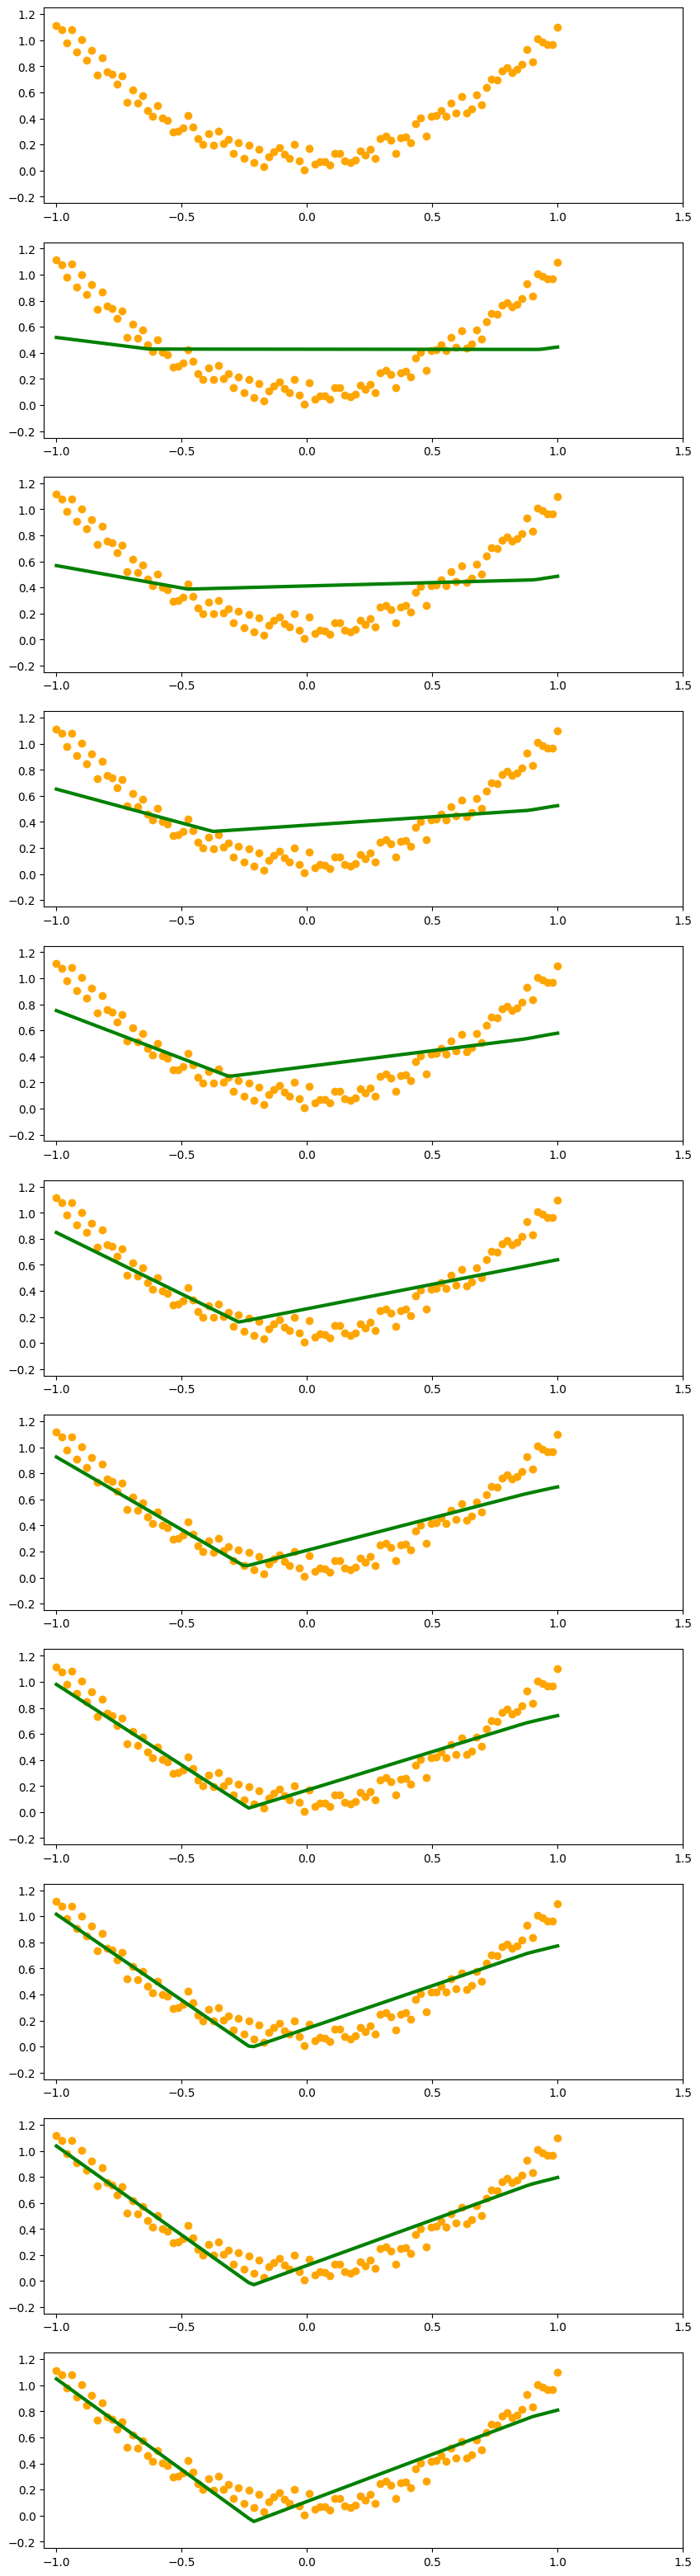

In [51]:
fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)